In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'similarity_bigmatrix_post_1s'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
#load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing', session='',
                          func=lambda x: x):
    all_of_them = {}
    for ani in animal_list:
        try:
            folder = '../%s/%s/notebooks/autorestore/%s/' % (ani, session, notebook)
            all_of_them.update({ani: func(ut.load_variable(varname, folder))})
        except IOError:
            print "Nope: %s, %s, %s" % (ani, session, varname)
    return all_of_them

In [6]:
vhpc_animals = ['90','90_475','91','93_500','93_580','93_720','93_810','c3m1', 'c3m2', 'c3f3', 'c10m8']
dhpc_animals = ['dhpc35','dhpc36','dhpc35_254']
all_animals = vhpc_animals+dhpc_animals

In [7]:
all_animals

['90',
 '90_475',
 '91',
 '93_500',
 '93_580',
 '93_720',
 '93_810',
 'c3m1',
 'c3m2',
 'c3f3',
 'c10m8',
 'dhpc35',
 'dhpc36',
 'dhpc35_254']

In [21]:
from sklearn.preprocessing import StandardScaler
patterns = load_all_animals_vars('patterns_tb', all_animals, notebook='decoding_around_onset', session='post',
                                     func=lambda x: StandardScaler().fit_transform(x))
labels = load_all_animals_vars('labels', all_animals, notebook='decoding_around_onset', session='post')

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [13]:
pattern_ids = range(1, 5)
res = {}
for ani in patterns.keys():
    all_patterns = [patterns[ani][labels[ani]==i] for i in range(1, 5)]
    corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids, all_patterns)
    res[ani] = corrmat_distr
    print ".",

In [14]:
values_d = np.r_[[[np.mean(res[ani][(p1, p2)]) for ani in dhpc_animals]
                for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)
values_v = np.r_[[[np.mean(res[ani][(p1, p2)]) for ani in vhpc_animals]
                for p1, p2 in product(pattern_ids, repeat=2)]].mean(1).reshape(len(pattern_ids), -1)

KeyError: 'dhpc35'

/home/fabios/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


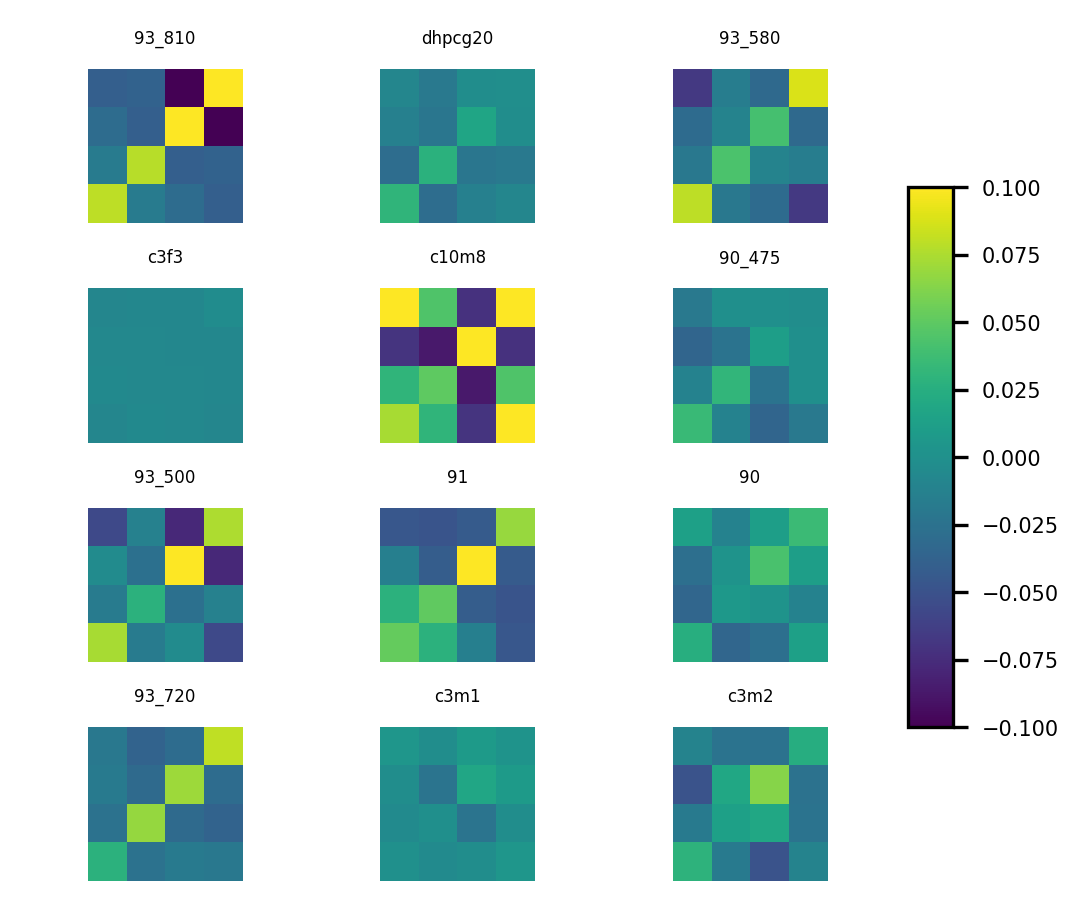

In [13]:
fig, axs = pl.subplots(4, 3, figsize=(3,3),sharex=True, sharey=True)
for ani, ax in zip(patterns.keys(), axs.flatten()):
    im = ax.imshow(np.r_[[np.mean(res[ani][(p1, p2)]) for p1, p2 in product(pattern_ids, repeat=2)]].reshape(len(pattern_ids), -1),
              origin='lower', aspect='equal', vmin=-0.1, vmax=0.1)
    pt.remove_axes(ax)
    ax.set_title(ani, fontsize=4)
ax = fig.add_axes((1, 0.2, 0.05, 0.6))
fig.colorbar(im, cax=ax)
fig.tight_layout()

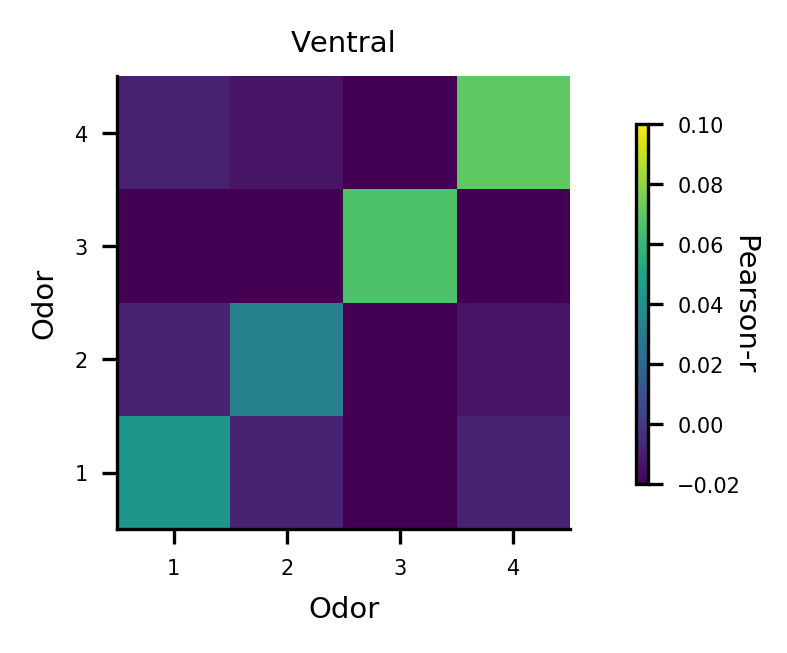

In [17]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2), sharex=True, sharey=True)
im = ax.imshow(values_v, origin='lower', aspect='equal', vmin=-0.02, vmax=0.1, cmap=pl.cm.viridis)

# pt.nicer_plot(ax)
ax.set_xlim(-0.5, values_v.shape[0]-0.5)
ax.set_xticks(range(values_v.shape[0]))
ax.set_xticklabels(pattern_ids)
ax.set_ylim(-0.5, values_v.shape[0]-0.5)
ax.set_yticks(range(values_v.shape[0]))
ax.set_yticklabels(pattern_ids)

ax.set_xlabel('Odor')
ax.set_ylabel('Odor')
ax.set_title('Ventral')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)

fig.savefig('../img/%s_vhpc.jpg'%NOTEBOOK_NAME)

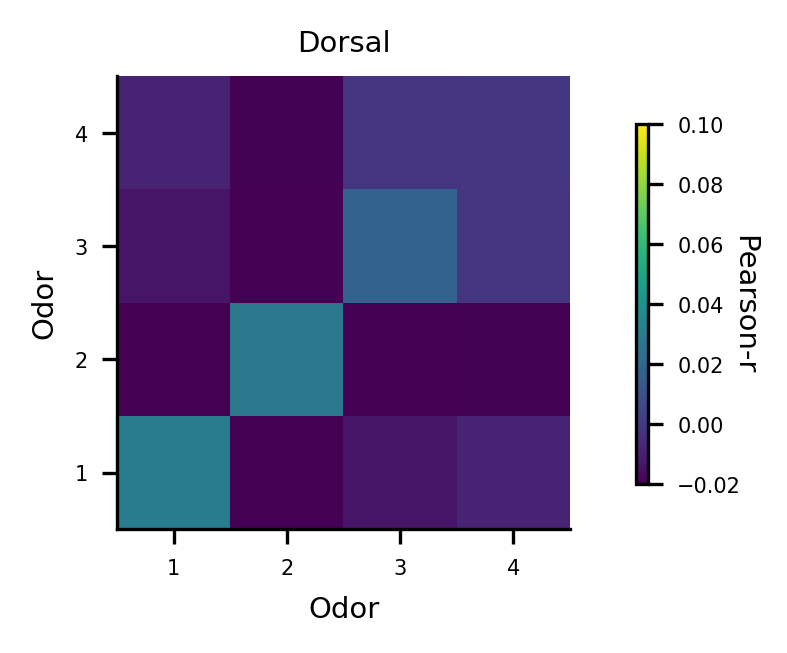

In [18]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2), sharex=True, sharey=True)
im = ax.imshow(values_d, origin='lower', aspect='equal', vmin=-0.02, vmax=0.1, cmap=pl.cm.viridis)

# pt.nicer_plot(ax)
ax.set_xlim(-0.5, values_d.shape[0]-0.5)
ax.set_xticks(range(values_d.shape[0]))
ax.set_xticklabels(pattern_ids)
ax.set_ylim(-0.5, values_d.shape[0]-0.5)
ax.set_yticks(range(values_d.shape[0]))
ax.set_yticklabels(pattern_ids)

ax.set_xlabel('Odor')
ax.set_ylabel('Odor')

ax.set_title('Dorsal')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)

fig.savefig('../img/%s_dhpc.jpg'%NOTEBOOK_NAME)

In [19]:
corrs = {}
for ani in patterns.keys():
    # minimum number of 
    all_patterns = np.concatenate([patterns[ani][labels[ani]==i] for i in range(1, 5)])
    print [(labels[ani]==i).sum() for i in range(1, 5)]
    corrs[ani] = [sstats.pearsonr(p1, p2)[0] for p1, p2 in product(all_patterns, repeat=2)]
    print ".",

[30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
. [30, 30, 30, 30]
.


In [20]:
corrs_d = np.mean([corrs[ani] for ani in dhpc_animals], 0).reshape(len(pattern_ids)*30, -1)
corrs_v = np.mean([corrs[ani] for ani in vhpc_animals], 0).reshape(len(pattern_ids)*30, -1)

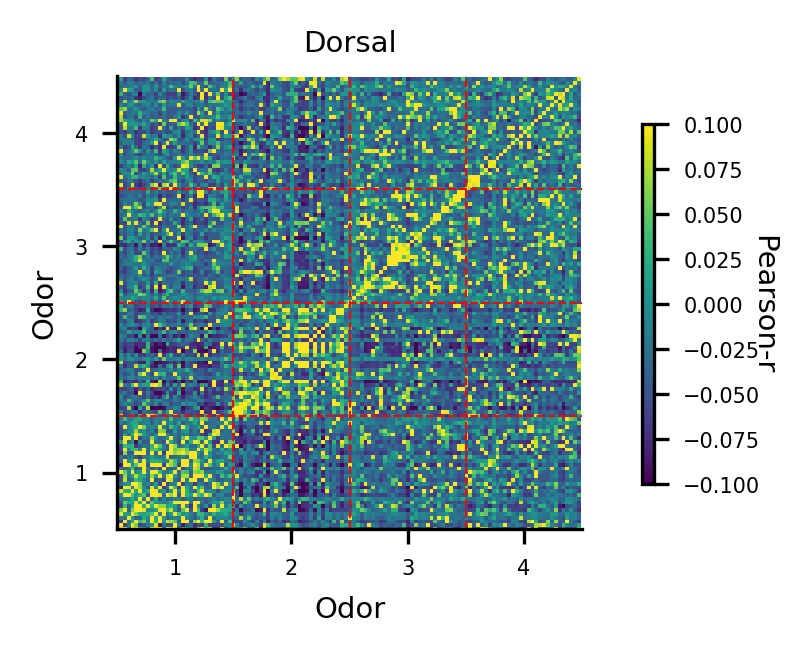

In [21]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2), sharex=True, sharey=True)
im = ax.imshow(corrs_d, origin='lower', aspect='auto', vmin=-0.1, vmax=0.1)

pt.nicer_plot(ax)
ax.set_xlim(0, corrs_d.shape[0])
ax.set_xticks(np.arange(0, corrs_d.shape[0], corrs_d.shape[0]/len(pattern_ids))+corrs_d.shape[0]/len(pattern_ids)/2)
ax.set_xticklabels(pattern_ids)
ax.set_ylim(0, corrs_d.shape[0])
ax.set_yticks(np.arange(0, corrs_d.shape[0], corrs_d.shape[0]/len(pattern_ids))+corrs_d.shape[0]/len(pattern_ids)/2)
ax.set_yticklabels(pattern_ids)
ax.vlines(range(30, len(pattern_ids)*30, 30), 0, corrs_d.shape[0],
          color='r', linestyle='dashed', lw=0.5)
ax.hlines(range(30, len(pattern_ids)*30, 30), 0, corrs_d.shape[0],
          color='r', linestyle='dashed', lw=0.5)

ax.set_xlabel('Odor')
ax.set_ylabel('Odor')

ax.set_title('Dorsal')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)


# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)

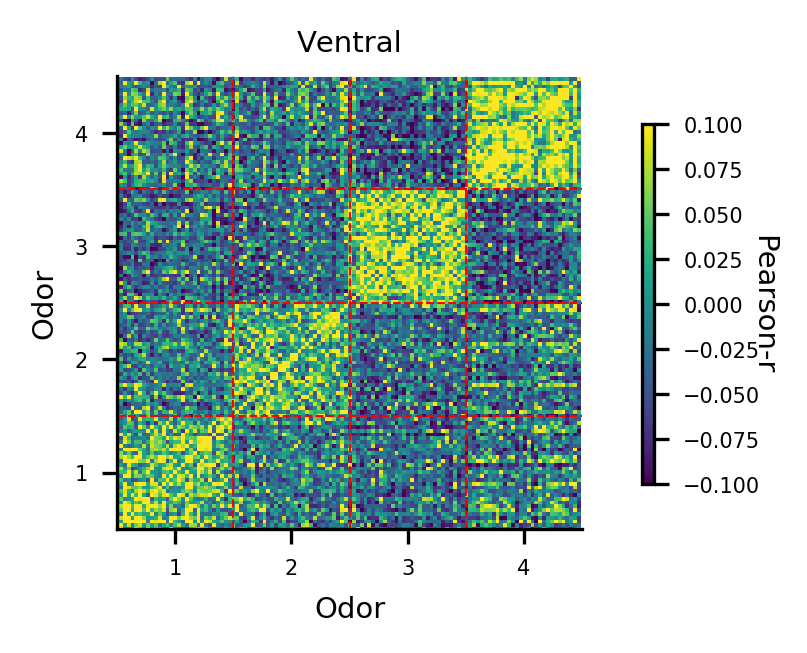

In [22]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2), sharex=True, sharey=True)
im = ax.imshow(corrs_v, origin='lower', aspect='auto', vmin=-0.1, vmax=0.1)

pt.nicer_plot(ax)
ax.set_xlim(0, corrs_v.shape[0])
ax.set_xticks(np.arange(0, corrs_v.shape[0], corrs_v.shape[0]/len(pattern_ids))+corrs_v.shape[0]/len(pattern_ids)/2)
ax.set_xticklabels(pattern_ids)
ax.set_ylim(0, corrs_v.shape[0])
ax.set_yticks(np.arange(0, corrs_v.shape[0], corrs_v.shape[0]/len(pattern_ids))+corrs_v.shape[0]/len(pattern_ids)/2)
ax.set_yticklabels(pattern_ids)
ax.vlines(range(30, len(pattern_ids)*30, 30), 0, corrs_v.shape[0],
          color='r', linestyle='dashed', lw=0.5)
ax.hlines(range(30, len(pattern_ids)*30, 30), 0, corrs_v.shape[0],
          color='r', linestyle='dashed', lw=0.5)

ax.set_xlabel('Odor')
ax.set_ylabel('Odor')

ax.set_title('Ventral')

ax = fig.add_axes((1, 0.2, 0.02, 0.6))
fig.colorbar(im, cax=ax)
ax.set_ylabel('Pearson-r',rotation=-90)

# axs[0].set_title('DG', fontsize=7)
# axs[1].set_title('LEC', fontsize=7)